## ***Spam Messages***

*Checking if the data is balanced or not*

In [ ]:
import pandas as pd

df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

spam_count = df['v1'].value_counts().get('spam', 0)
ham_count = df['v1'].value_counts().get('ham', 0)

print('Spam Count:', spam_count)
print('Ham Count:', ham_count)

Spam Count: 747
Ham Count: 4825


*OOPS!! The data is imbalanced*

*Here i used  italicized textTF-IDF (Term Frequency-Inverse Document Frequency)vectorizer to convert the text messages into numerical features and then train a classifier.*



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df['v2']
y = df['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.97

Confusion Matrix:
[[964   1]
 [ 35 115]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



*An accuracy of 97% is generally quite high and indicates that the model is performing well on the test set. However, in imbalanced datasets, accuracy alone may not be the best metric to evaluate the model's performance. This is because a high accuracy can be achieved by simply predicting the majority class, especially when the classes are imbalanced.*








*It's essential to consider metrics such as precision, recall, and F1-score, especially for the minority class (spam). In this case, the high precision indicates that when the model predicts spam, it's usually correct. However, the recall is lower, suggesting that the model may not be capturing all instances of spam.*

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

X = df['v2']
y = df['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.98

Confusion Matrix:
[[953  12]
 [ 13 137]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.92      0.91      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## *Visualizing the performance spam classification model*

*Heatmap*

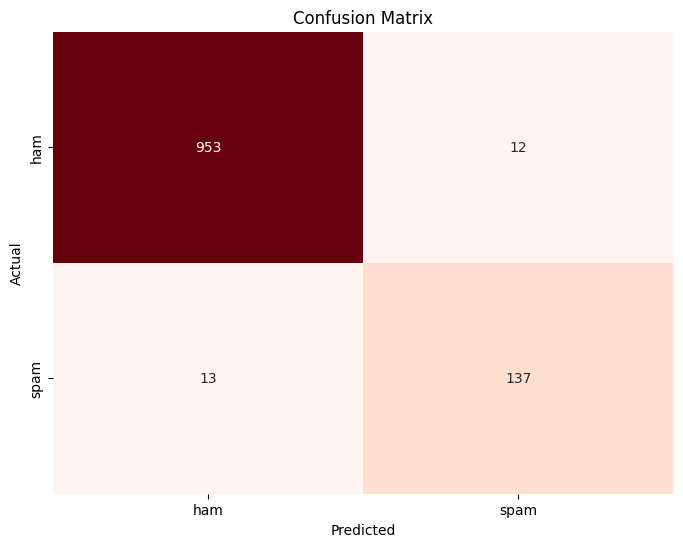

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*ROC-Curve*

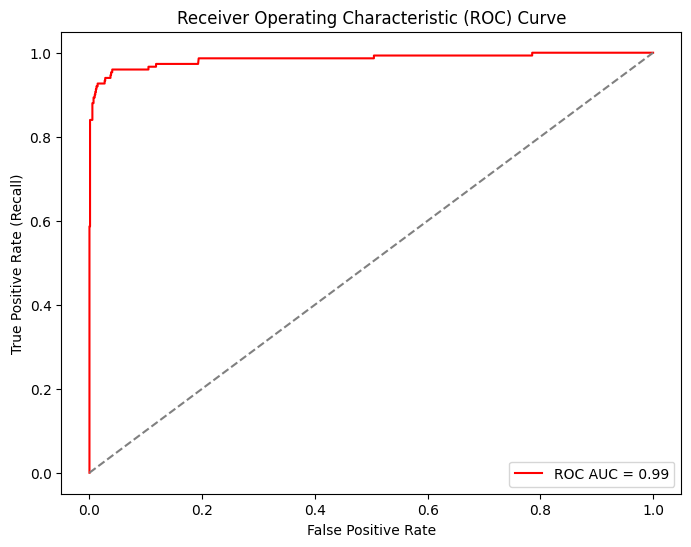

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

X = df['v2']
y = df['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train_tfidf, y_train)

y_test_binary = y_test.map({'ham': 0, 'spam': 1})

fpr, tpr, _ = roc_curve(y_test_binary, classifier.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

*Precision Recall Curve*

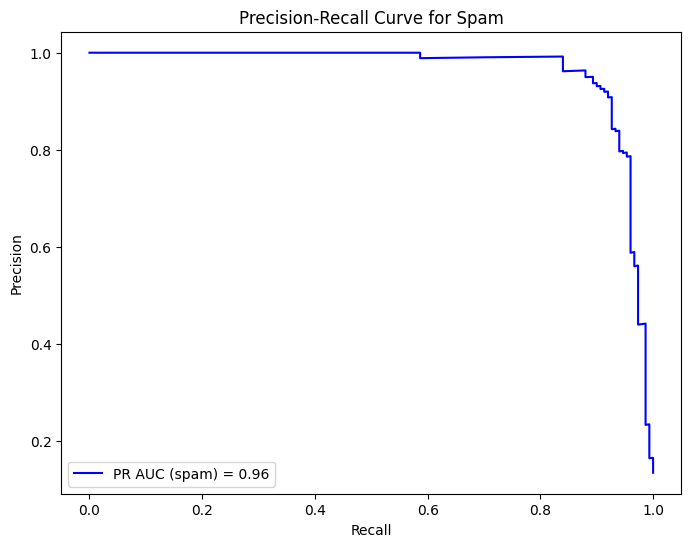

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

X = df['v2']
y = df['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train_tfidf, y_train)

y_test_binary = y_test.map({'ham': 0, 'spam': 1})

precision, recall, _ = precision_recall_curve(y_test_binary, classifier.predict_proba(X_test_tfidf)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'PR AUC (spam) = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Spam')
plt.legend()
plt.show()